Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Visualizing sample images...


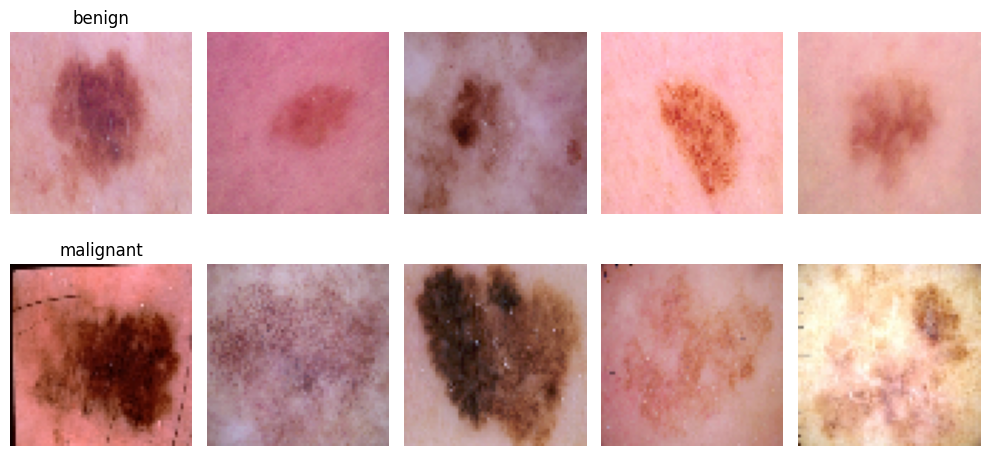


Running Logistic Regression...

Logistic Regression Results:
Accuracy: 0.748

Classification Report:
              precision    recall  f1-score   support

      benign       0.76      0.79      0.78       277
   malignant       0.73      0.69      0.71       223

    accuracy                           0.75       500
   macro avg       0.75      0.74      0.74       500
weighted avg       0.75      0.75      0.75       500



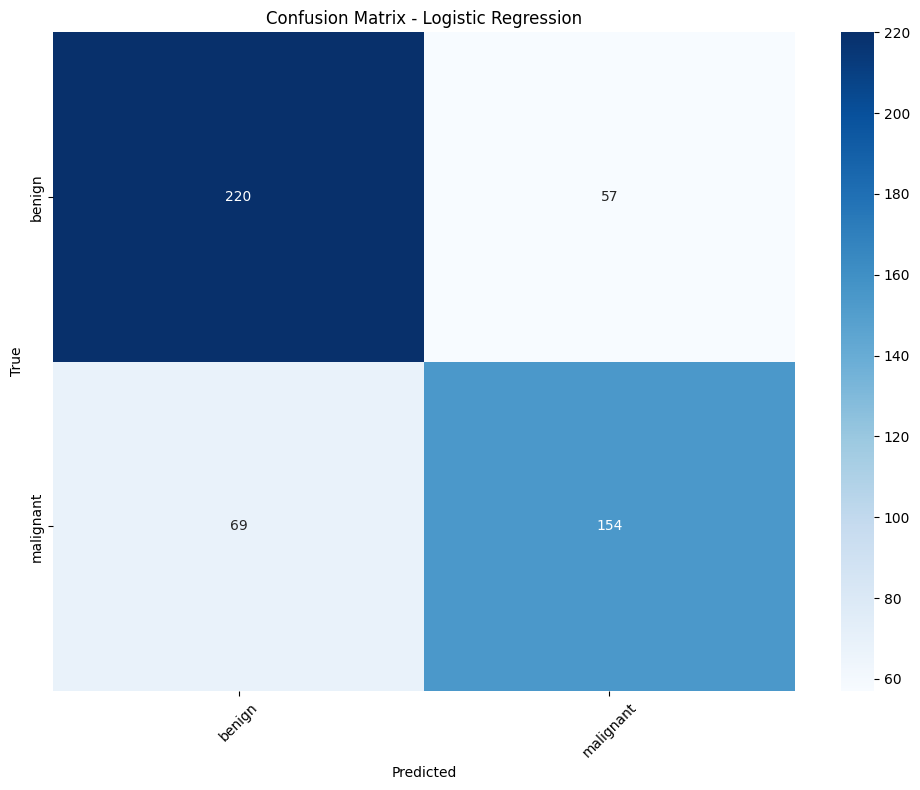


Running K-Nearest Neighbors (KNN)...

KNN Results:
Accuracy: 0.732

Classification Report:
              precision    recall  f1-score   support

      benign       0.72      0.85      0.78       277
   malignant       0.76      0.59      0.66       223

    accuracy                           0.73       500
   macro avg       0.74      0.72      0.72       500
weighted avg       0.74      0.73      0.73       500



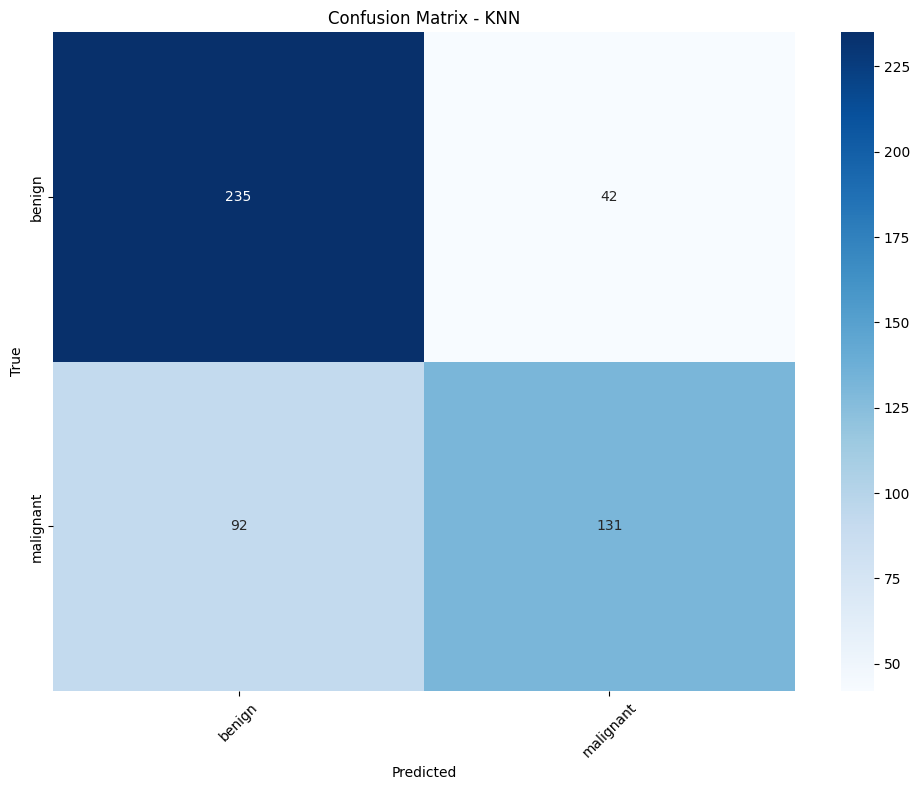

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns


class CancerClassifier:
    def __init__(self):  # Corrected constructor name
        # Class labels for the dataset
        self.class_names = ['benign', 'malignant']
        self.load_data()


    def load_data(self, train_size=None, test_size=None):
        """Load and preprocess the skin cancer dataset with controlled dataset size."""
        train_dir = 'archive/train'
        test_dir = 'archive/test'

        # Preprocessing for training and testing (normalize pixel values)
        datagen = ImageDataGenerator(rescale=1/255.0)

        # Load training data
        self.train_data = datagen.flow_from_directory(
            train_dir,
            target_size=(64, 64),
            class_mode='sparse',
            shuffle=True,
            seed=1
        )

        # Load testing data
        self.test_data = datagen.flow_from_directory(
            test_dir,
            target_size=(64, 64),
            class_mode='sparse',
            shuffle=True,
            seed=1
        )

        # Prepare training data
        total_train_samples = self.train_data.samples
        if train_size is None or train_size > total_train_samples:
            train_size = total_train_samples
        train_batches = []
        train_labels = []
        while len(train_batches) < train_size:
            batch = next(self.train_data)
            train_batches.append(batch[0])
            train_labels.append(batch[1])
        self.X_train = np.vstack(train_batches)[:train_size].reshape(train_size, -1)
        self.y_train = np.hstack(train_labels)[:train_size]

        # Prepare testing data
        total_test_samples = self.test_data.samples
        if test_size is None or test_size > total_test_samples:
            test_size = total_test_samples
        test_batches = []
        test_labels = []
        while len(test_batches) < test_size:
            batch = next(self.test_data)
            test_batches.append(batch[0])
            test_labels.append(batch[1])
        self.X_test = np.vstack(test_batches)[:test_size].reshape(test_size, -1)
        self.y_test = np.hstack(test_labels)[:test_size]



    def visualize_samples(self, num_samples=5):
        """Visualize sample images from each class."""
        plt.figure(figsize=(10, 5))
        for class_idx, class_name in enumerate(self.class_names):
            class_images = [
                self.train_data[i][0][np.where(self.train_data[i][1] == class_idx)[0][0]]
                for i in range(len(self.train_data))
                if np.any(self.train_data[i][1] == class_idx)
            ][:num_samples]

            for sample_idx, img in enumerate(class_images):
                plt.subplot(len(self.class_names), num_samples, class_idx * num_samples + sample_idx + 1)
                plt.imshow(img)
                plt.axis('off')
                if sample_idx == 0:
                    plt.title(class_name)
        plt.tight_layout()
        plt.show()

    def evaluate_model(self, y_true, y_pred, model_name):
        """Evaluate model performance and display metrics."""
        print(f"\n{model_name} Results:")
        print("Accuracy:", accuracy_score(y_true, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred, target_names=self.class_names))

        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=self.class_names,
                    yticklabels=self.class_names)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def run_experiments(self):
        """Run experiments with Logistic Regression and KNN."""

        # Logistic Regression
        print("\nRunning Logistic Regression...")
        log_reg = LogisticRegression(max_iter=1000)
        log_reg.fit(self.X_train, self.y_train)
        log_reg_predictions = log_reg.predict(self.X_test)
        self.evaluate_model(self.y_test, log_reg_predictions, "Logistic Regression")

        # K-Nearest Neighbors (KNN)
        print("\nRunning K-Nearest Neighbors (KNN)...")
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(self.X_train, self.y_train)
        knn_predictions = knn.predict(self.X_test)
        self.evaluate_model(self.y_test, knn_predictions, "KNN")


if __name__ == "__main__":
    # Initialize the classifier with controlled dataset size
    classifier = CancerClassifier()
    classifier.load_data(train_size=1000, test_size=500)  # Adjust sizes as needed

    # Visualize sample images
    print("Visualizing sample images...")
    classifier.visualize_samples()

    # Run classification experiments
    classifier.run_experiments()



Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Visualizing sample images...


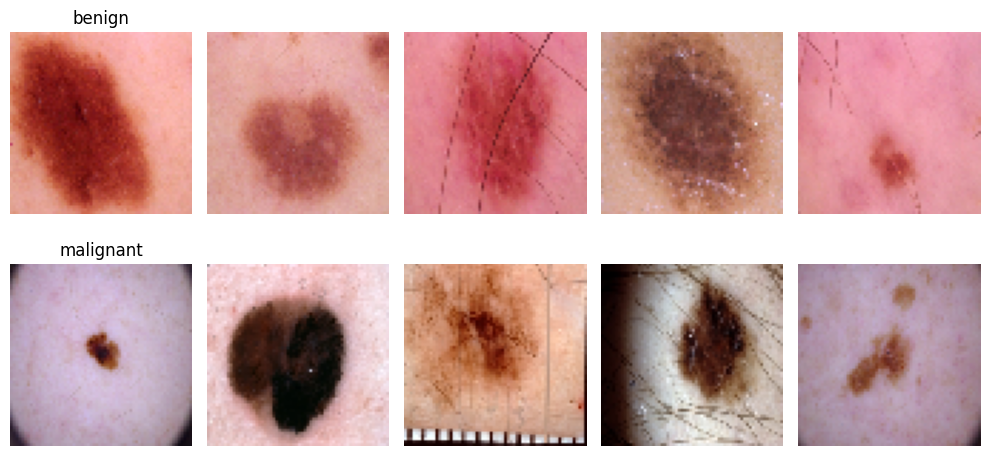


Running Logistic Regression...

Logistic Regression Results:
Accuracy: 0.7757575757575758

Classification Report:
              precision    recall  f1-score   support

      benign       0.79      0.81      0.80       360
   malignant       0.76      0.74      0.75       300

    accuracy                           0.78       660
   macro avg       0.77      0.77      0.77       660
weighted avg       0.78      0.78      0.78       660



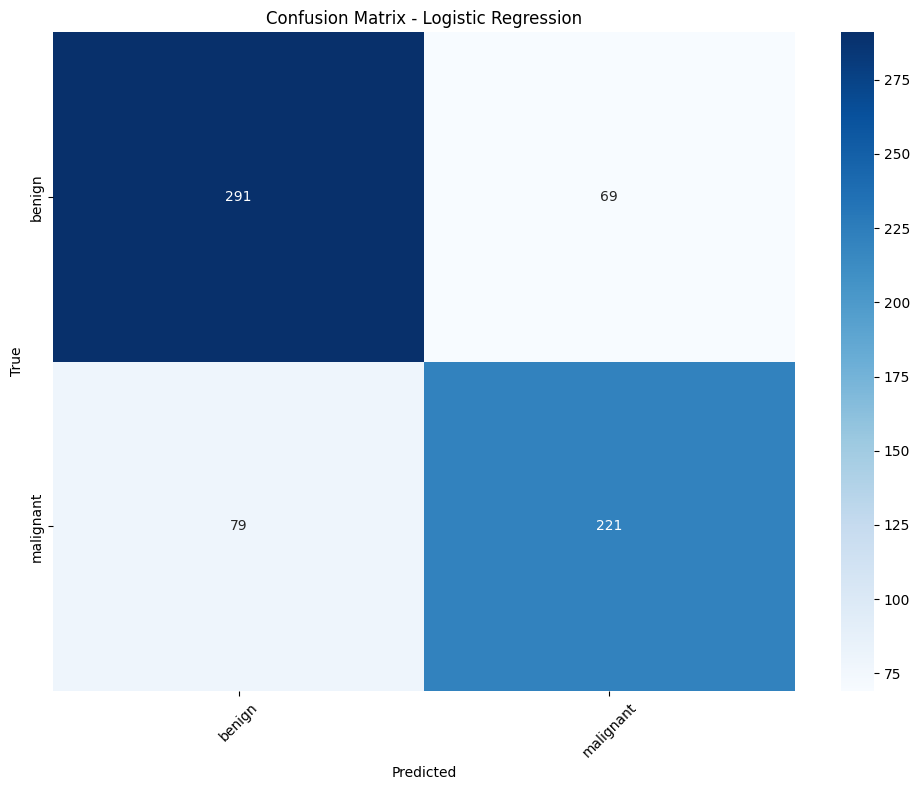


Running K-Nearest Neighbors (KNN)...

KNN Results:
Accuracy: 0.7575757575757576

Classification Report:
              precision    recall  f1-score   support

      benign       0.74      0.87      0.80       360
   malignant       0.80      0.63      0.70       300

    accuracy                           0.76       660
   macro avg       0.77      0.75      0.75       660
weighted avg       0.76      0.76      0.75       660



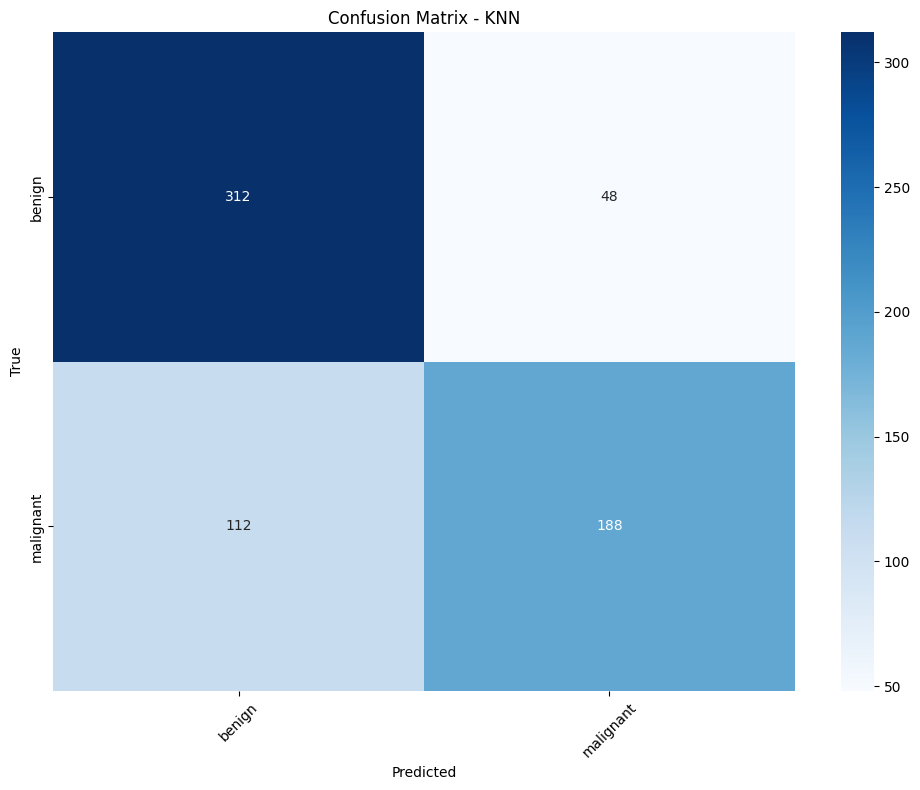

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns


class CancerClassifier:
    def __init__(self):  # Corrected constructor name
        # Class labels for the dataset
        self.class_names = ['benign', 'malignant']
        self.load_data()


    def load_data(self):
        """Load and preprocess the skin cancer dataset."""
        train_dir = 'archive/train'
        test_dir = 'archive/test'

        # Data preprocessing: normalize pixel values
        data_gen = ImageDataGenerator(rescale=1/255.0)

        # Load and preprocess training data
        train_data = data_gen.flow_from_directory(
            train_dir,
            target_size=(64, 64),
            class_mode='sparse',
            shuffle=True,
            seed=1
        )
        X_train = np.vstack([train_data[i][0] for i in range(len(train_data))])
        y_train = np.hstack([train_data[i][1] for i in range(len(train_data))])

        # Load and preprocess testing data
        test_data = data_gen.flow_from_directory(
            test_dir,
            target_size=(64, 64),
            class_mode='sparse',
            shuffle=False,
            seed=1
        )
        X_test = np.vstack([test_data[i][0] for i in range(len(test_data))])
        y_test = np.hstack([test_data[i][1] for i in range(len(test_data))])

        # Flatten image data
        self.X_train = X_train.reshape(X_train.shape[0], -1)
        self.X_test = X_test.reshape(X_test.shape[0], -1)
        self.y_train = y_train
        self.y_test = y_test




    def visualize_samples(self, num_samples=5):
        """Visualize sample images from each class."""
        plt.figure(figsize=(10, 5))
        for class_idx, class_name in enumerate(self.class_names):
            # Find indices of the images that belong to the current class
            class_indices = np.where(self.y_train == class_idx)[0]
            
            # Sample a few images from this class
            class_images = self.X_train[class_indices][:num_samples]
            
            for sample_idx, img in enumerate(class_images):
                plt.subplot(len(self.class_names), num_samples, class_idx * num_samples + sample_idx + 1)
                plt.imshow(img.reshape(64, 64, 3))  # Reshape to (64, 64, 3) for visualization
                plt.axis('off')
                if sample_idx == 0:
                    plt.title(class_name)
        plt.tight_layout()
        plt.show()


    def evaluate_model(self, y_true, y_pred, model_name):
        """Evaluate model performance and display metrics."""
        print(f"\n{model_name} Results:")
        print("Accuracy:", accuracy_score(y_true, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred, target_names=self.class_names))

        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=self.class_names,
                    yticklabels=self.class_names)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def run_experiments(self):
        """Run experiments with Logistic Regression and KNN."""

        # Logistic Regression
        print("\nRunning Logistic Regression...")
        log_reg = LogisticRegression(max_iter=1000)
        log_reg.fit(self.X_train, self.y_train)
        log_reg_predictions = log_reg.predict(self.X_test)
        self.evaluate_model(self.y_test, log_reg_predictions, "Logistic Regression")

        # K-Nearest Neighbors (KNN)
        print("\nRunning K-Nearest Neighbors (KNN)...")
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(self.X_train, self.y_train)
        knn_predictions = knn.predict(self.X_test)
        self.evaluate_model(self.y_test, knn_predictions, "KNN")


if __name__ == "__main__":
    # Initialize the classifier with controlled dataset size
    classifier = CancerClassifier()
    classifier.load_data()  # Adjust sizes as needed

    # Visualize sample images
    print("Visualizing sample images...")
    classifier.visualize_samples()

    # Run classification experiments
    classifier.run_experiments()



Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Visualizing sample images...


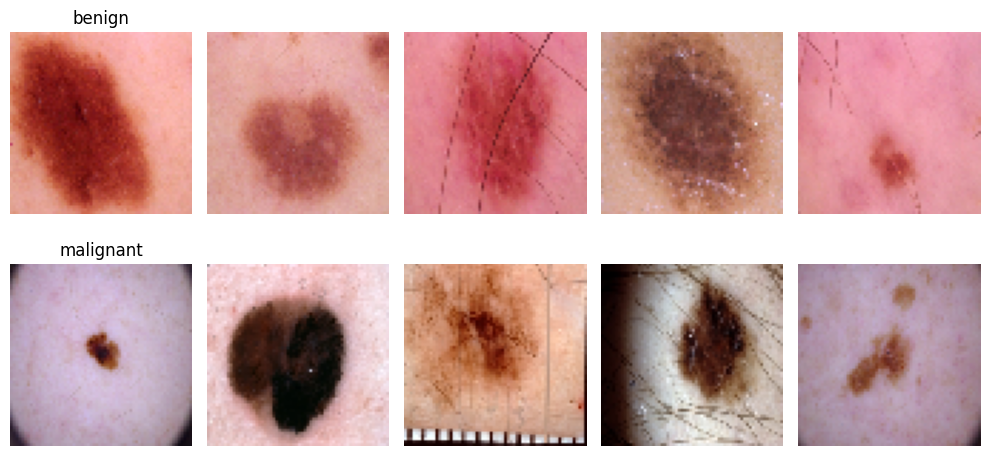


Running Logistic Regression...

Logistic Regression Results:
Accuracy: 0.7757575757575758

Classification Report:
              precision    recall  f1-score   support

      benign       0.79      0.81      0.80       360
   malignant       0.76      0.74      0.75       300

    accuracy                           0.78       660
   macro avg       0.77      0.77      0.77       660
weighted avg       0.78      0.78      0.78       660



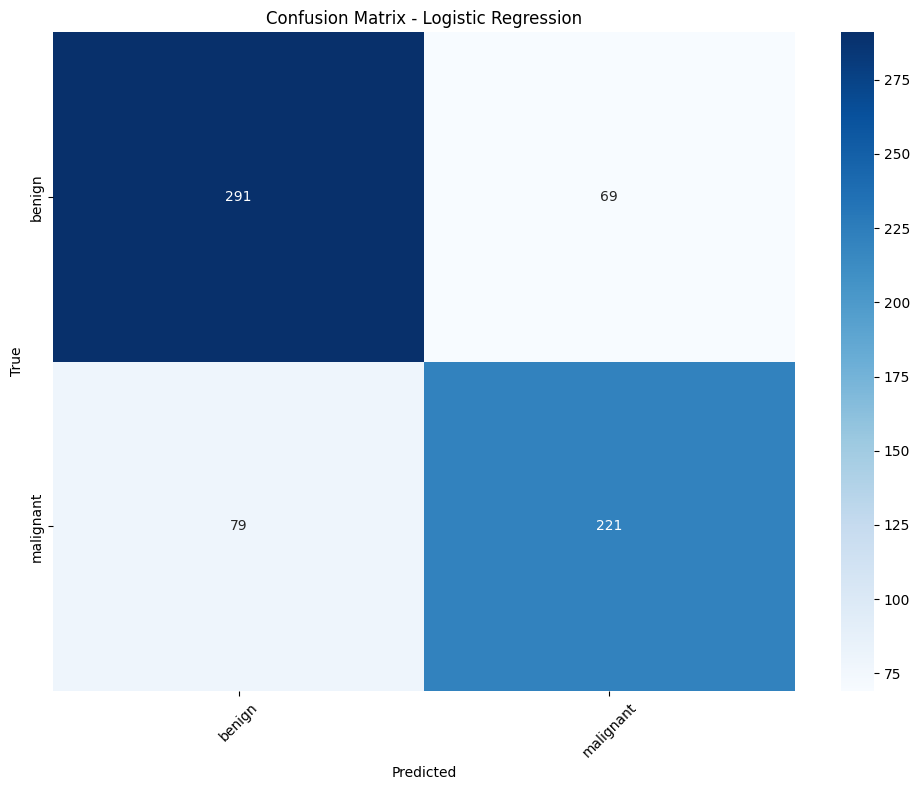


Running K-Nearest Neighbors (KNN)...

KNN Results:
Accuracy: 0.7575757575757576

Classification Report:
              precision    recall  f1-score   support

      benign       0.74      0.87      0.80       360
   malignant       0.80      0.63      0.70       300

    accuracy                           0.76       660
   macro avg       0.77      0.75      0.75       660
weighted avg       0.76      0.76      0.75       660



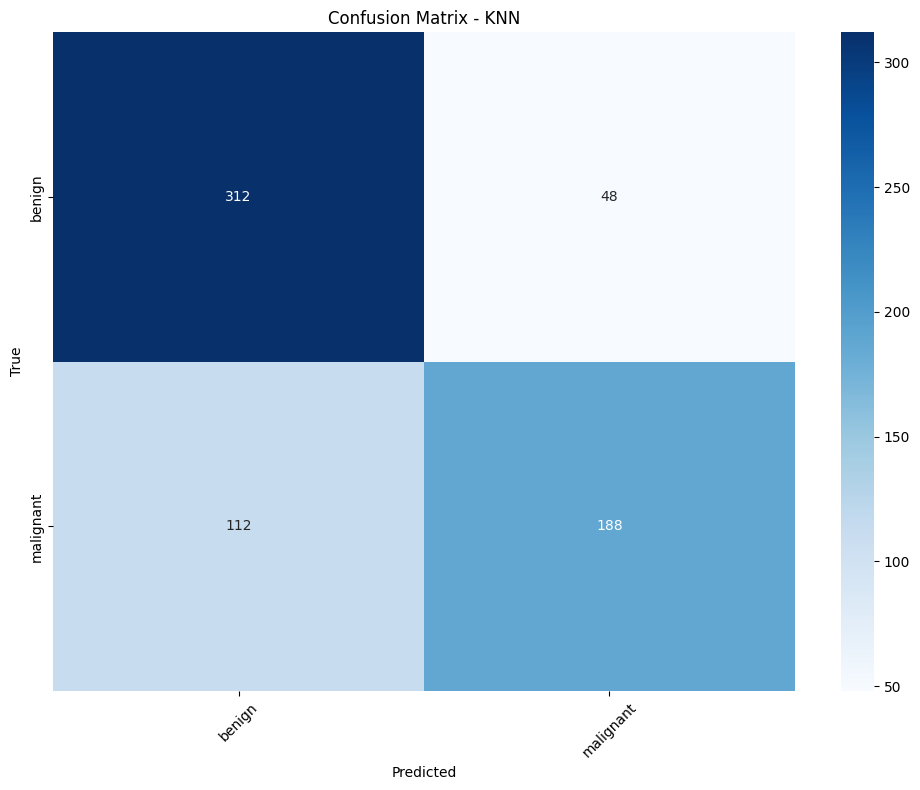


Running Feed-Forward Neural Network...
Epoch 1/10


c:\Users\momog\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5050 - loss: 2.7653 - val_accuracy: 0.5701 - val_loss: 0.6919
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5367 - loss: 0.6923 - val_accuracy: 0.5701 - val_loss: 0.6898
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5429 - loss: 0.6933 - val_accuracy: 0.5701 - val_loss: 0.6884
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5387 - loss: 0.6908 - val_accuracy: 0.5701 - val_loss: 0.6875
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5425 - loss: 0.6901 - val_accuracy: 0.5701 - val_loss: 0.6866
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5522 - loss: 0.6887 - val_accuracy: 0.5701 - val_loss: 0.6862
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5268 - loss: 0.6918 - val_accuracy: 0.5701 - val_loss: 0.6859
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5317 - loss: 0.6912 - val_accuracy: 0.5701 - val_loss: 0.

c:\Users\momog\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\momog\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\momog\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

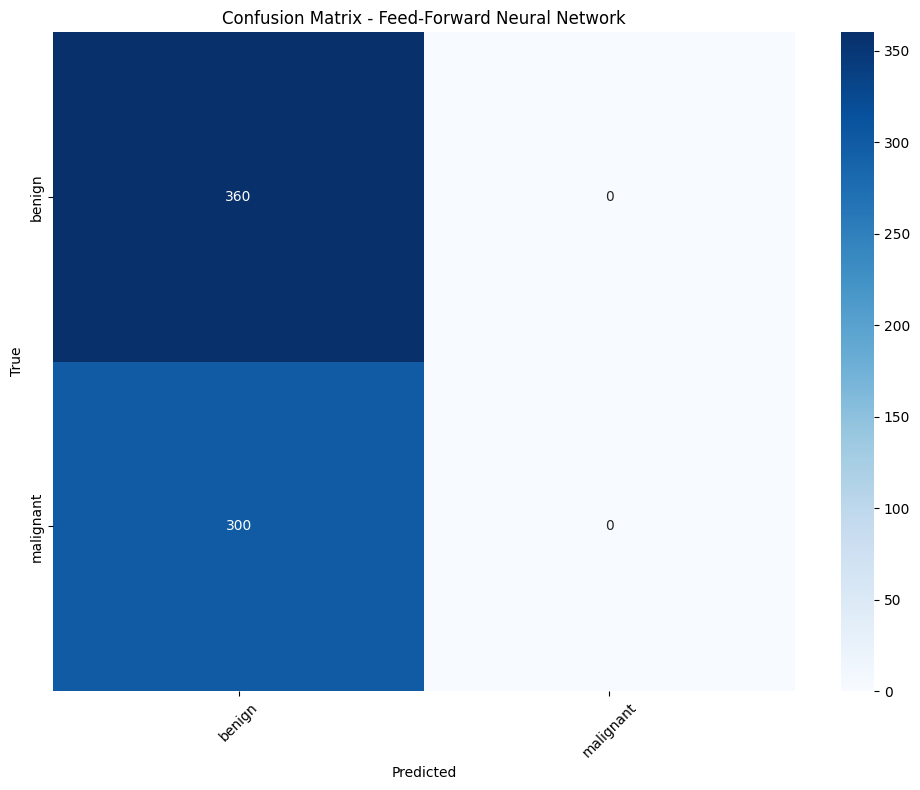


Running Convolutional Neural Network...


c:\Users\momog\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 12288), dtype=float32). Expected shape (None, 64, 64, 3), but input has incompatible shape (None, 12288)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 12288), dtype=float32)
  • training=True
  • mask=None

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
import seaborn as sns


class CancerClassifier:
    def __init__(self):  # Corrected constructor name
        # Class labels for the dataset
        self.class_names = ['benign', 'malignant']
        self.num_classes = len(self.class_names)
        self.load_data()


    def load_data(self):
        """Load and preprocess the skin cancer dataset."""
        train_dir = 'archive/train'
        test_dir = 'archive/test'

        # Data preprocessing: normalize pixel values
        data_gen = ImageDataGenerator(rescale=1/255.0)

        # Load and preprocess training data
        train_data = data_gen.flow_from_directory(
            train_dir,
            target_size=(64, 64),
            class_mode='sparse',
            shuffle=True,
            seed=1
        )
        X_train = np.vstack([train_data[i][0] for i in range(len(train_data))])
        y_train = np.hstack([train_data[i][1] for i in range(len(train_data))])

        # Load and preprocess testing data
        test_data = data_gen.flow_from_directory(
            test_dir,
            target_size=(64, 64),
            class_mode='sparse',
            shuffle=False,
            seed=1
        )
        X_test = np.vstack([test_data[i][0] for i in range(len(test_data))])
        y_test = np.hstack([test_data[i][1] for i in range(len(test_data))])

        # Flatten image data
        self.X_train = X_train.reshape(X_train.shape[0], -1)
        self.X_test = X_test.reshape(X_test.shape[0], -1)
        self.y_train = y_train
        self.y_test = y_test


    def visualize_samples(self, num_samples=5):
        """Visualize sample images from each class."""
        plt.figure(figsize=(10, 5))
        for class_idx, class_name in enumerate(self.class_names):
            # Find indices of the images that belong to the current class
            class_indices = np.where(self.y_train == class_idx)[0]
            
            # Sample a few images from this class
            class_images = self.X_train[class_indices][:num_samples]
            
            for sample_idx, img in enumerate(class_images):
                plt.subplot(len(self.class_names), num_samples, class_idx * num_samples + sample_idx + 1)
                plt.imshow(img.reshape(64, 64, 3))  # Reshape to (64, 64, 3) for visualization
                plt.axis('off')
                if sample_idx == 0:
                    plt.title(class_name)
        plt.tight_layout()
        plt.show()


    def evaluate_model(self, y_true, y_pred, model_name):
        """Evaluate model performance and display metrics."""
        print(f"\n{model_name} Results:")
        print("Accuracy:", accuracy_score(y_true, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred, target_names=self.class_names))

        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=self.class_names,
                    yticklabels=self.class_names)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


    def run_neural_network(self):
        """Run a simple feed-forward neural network."""
        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dense, Dropout
        from tensorflow.keras.optimizers import Adam
        
        print("\nRunning Feed-Forward Neural Network...")
        model = Sequential([
            Dense(128, activation='relu', input_shape=(self.X_train.shape[1],)),
            Dropout(0.5),
            Dense(self.num_classes, activation='softmax')
        ])
        model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.fit(self.X_train, self.y_train, epochs=10, batch_size=32, validation_split=0.2)
        predictions = np.argmax(model.predict(self.X_test), axis=1)
        self.evaluate_model(self.y_test, predictions, "Feed-Forward Neural Network")


    def run_cnn(self):
        """Run a Convolutional Neural Network (CNN)."""
        print("\nRunning Convolutional Neural Network...")

        # Define the CNN model
        model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),  # Input shape is (64, 64, 3)
            MaxPooling2D(pool_size=(2, 2)),
            Dropout(0.25),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Dropout(0.25),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(len(self.class_names), activation='softmax')  # Number of output classes
        ])
        
        # Compile the model
        model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        # Train the model
        model.fit(self.X_train, self.y_train, epochs=10, batch_size=32, validation_split=0.2)
        
        # Make predictions
        predictions = np.argmax(model.predict(self.X_test), axis=1)
        
        # Evaluate the model
        self.evaluate_model(self.y_test, predictions, "Convolutional Neural Network")


    def run_experiments(self):
        """Run experiments with Logistic Regression, KNN, and neural networks."""

        # Logistic Regression
        print("\nRunning Logistic Regression...")
        log_reg = LogisticRegression(max_iter=1000)
        log_reg.fit(self.X_train, self.y_train)
        log_reg_predictions = log_reg.predict(self.X_test)
        self.evaluate_model(self.y_test, log_reg_predictions, "Logistic Regression")

        # K-Nearest Neighbors (KNN)
        print("\nRunning K-Nearest Neighbors (KNN)...")
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(self.X_train, self.y_train)
        knn_predictions = knn.predict(self.X_test)
        self.evaluate_model(self.y_test, knn_predictions, "KNN")


if __name__ == "__main__":
    # Initialize the classifier with controlled dataset size
    classifier = CancerClassifier()
    classifier.load_data()  # Adjust sizes as needed

    # Visualize sample images
    print("Visualizing sample images...")
    classifier.visualize_samples()

    # Run classification experiments
    classifier.run_experiments()

    # Run neural network experiments
    classifier.run_neural_network()

    # Run CNN experiments
    classifier.run_cnn()


Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Visualizing sample images...


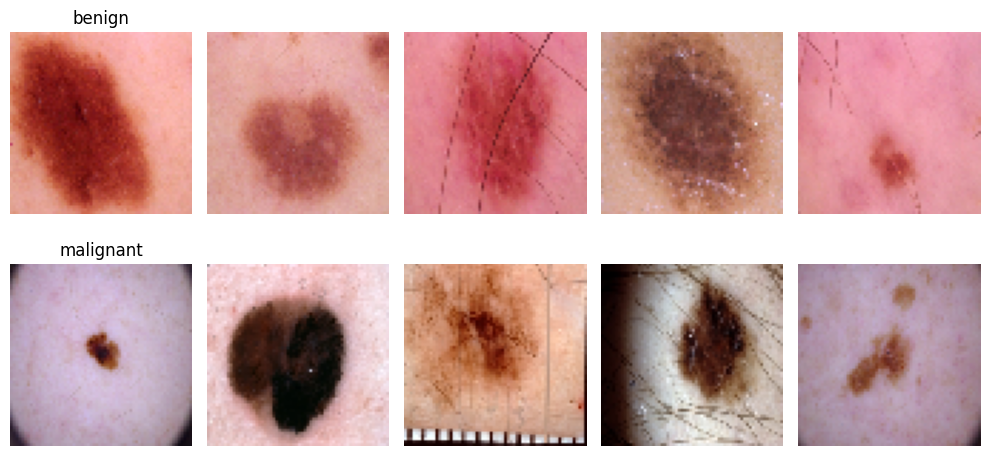


Running Logistic Regression...

Logistic Regression Results:
Accuracy: 0.7757575757575758

Classification Report:
              precision    recall  f1-score   support

      benign       0.79      0.81      0.80       360
   malignant       0.76      0.74      0.75       300

    accuracy                           0.78       660
   macro avg       0.77      0.77      0.77       660
weighted avg       0.78      0.78      0.78       660



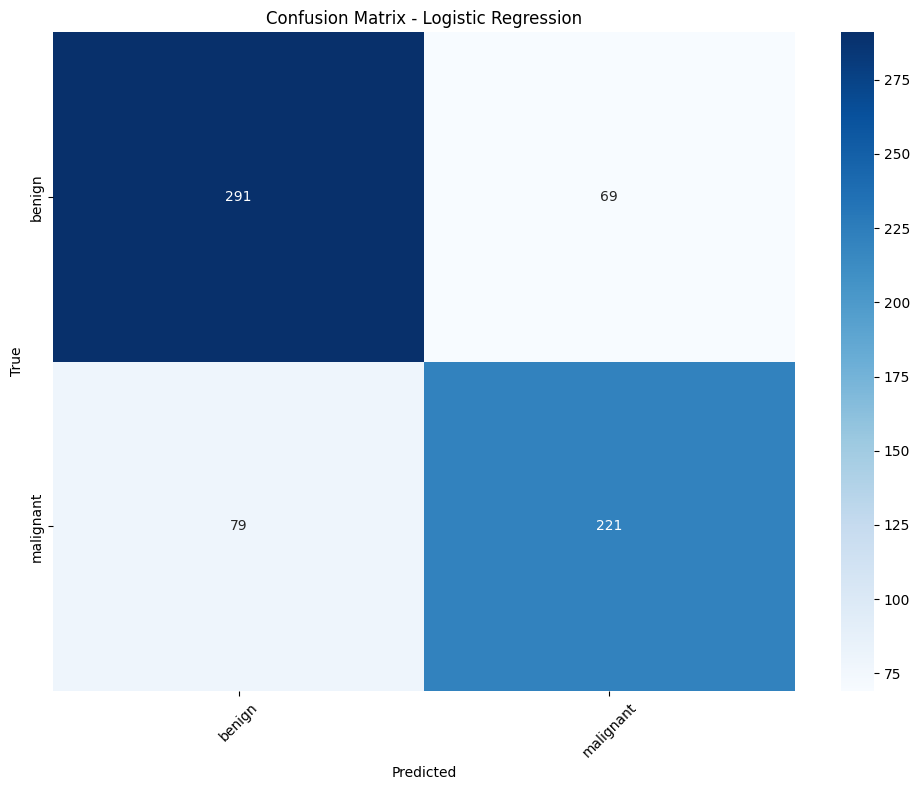


Running K-Nearest Neighbors (KNN)...

KNN Results:
Accuracy: 0.7575757575757576

Classification Report:
              precision    recall  f1-score   support

      benign       0.74      0.87      0.80       360
   malignant       0.80      0.63      0.70       300

    accuracy                           0.76       660
   macro avg       0.77      0.75      0.75       660
weighted avg       0.76      0.76      0.75       660



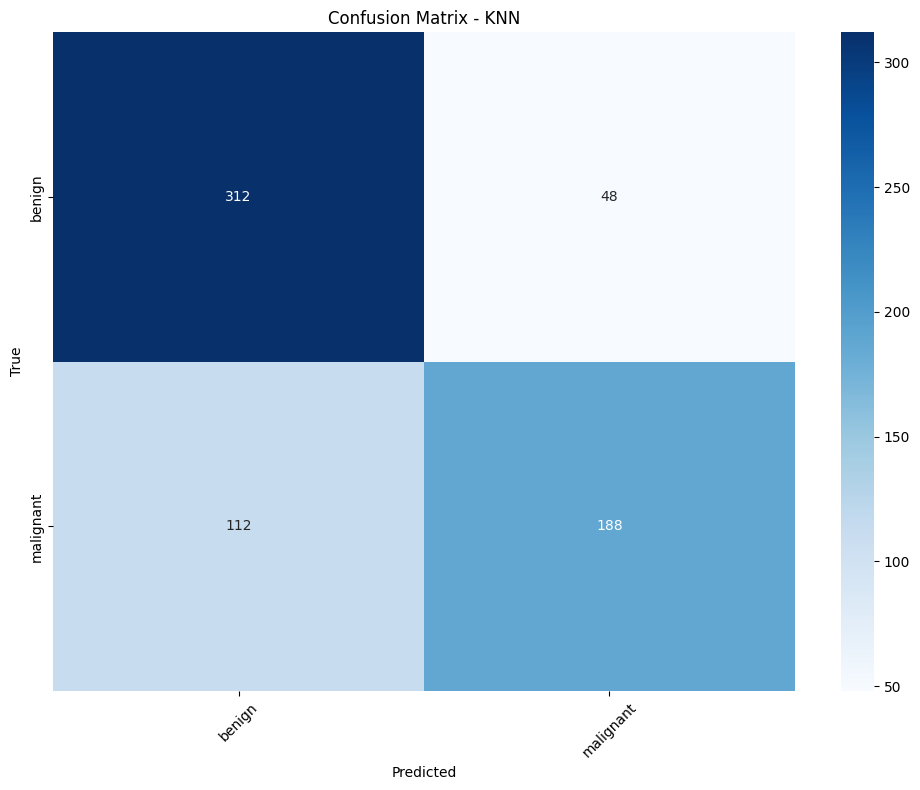


Running Feed-Forward Neural Network...
Epoch 1/10


c:\Users\momog\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5553 - loss: 2.0917 - val_accuracy: 0.5682 - val_loss: 0.6620
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5281 - loss: 0.6740 - val_accuracy: 0.6458 - val_loss: 0.6200
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5459 - loss: 0.6665 - val_accuracy: 0.7689 - val_loss: 0.6042
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5070 - loss: 0.6783 - val_accuracy: 0.5701 - val_loss: 0.6922
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5419 - loss: 0.6923 - val_accuracy: 0.5701 - val_loss: 0.6901
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5389 - loss: 0.6914 - val_accuracy: 0.5701 - val_loss: 0.6884
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5306 - loss: 0.6915 - val_accuracy: 0.5701 - val_loss: 0.6875
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5585 - loss: 0.6885 - val_accuracy: 0.5701 - val_loss: 0.

c:\Users\momog\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\momog\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\momog\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

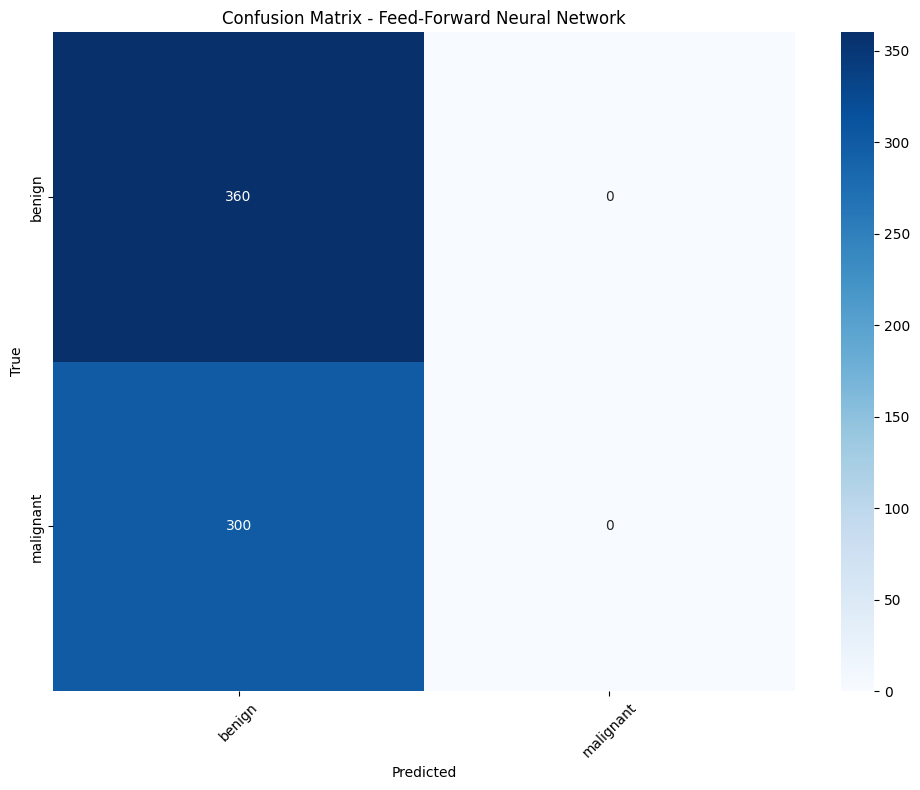


Running Convolutional Neural Network...


c:\Users\momog\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.5456 - loss: 0.7692 - val_accuracy: 0.7727 - val_loss: 0.4864
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.7157 - loss: 0.5397 - val_accuracy: 0.7708 - val_loss: 0.4455
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.7627 - loss: 0.4906 - val_accuracy: 0.8068 - val_loss: 0.4270
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7897 - loss: 0.4374 - val_accuracy: 0.8125 - val_loss: 0.4048
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.7976 - loss: 0.4076 - val_accuracy: 0.7784 - val_loss: 0.4226
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.7770 - loss: 0.4621 - val_accuracy: 0.8125 - val_loss: 0.4123
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8139 - loss: 0.3928 - val_accuracy: 0.7652 - val_loss: 0.4709
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8073 - loss: 0.3965 - val_accuracy: 0.7803 - v

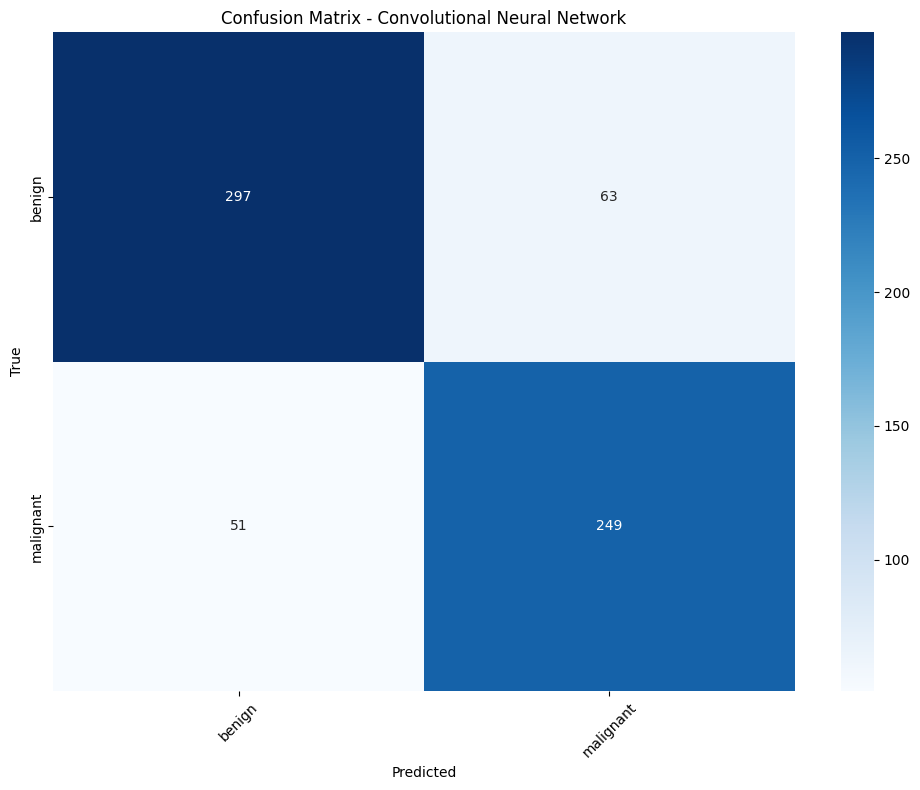

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
import seaborn as sns


class CancerClassifier:
    def __init__(self):  # Corrected constructor name
        # Class labels for the dataset
        self.class_names = ['benign', 'malignant']
        self.num_classes = len(self.class_names)
        self.load_data()


    def load_data(self):
        """Load and preprocess the skin cancer dataset."""
        train_dir = 'archive/train'
        test_dir = 'archive/test'

        # Data preprocessing: normalize pixel values
        data_gen = ImageDataGenerator(rescale=1/255.0)

        # Load and preprocess training data
        train_data = data_gen.flow_from_directory(
            train_dir,
            target_size=(64, 64),  # Image size
            class_mode='sparse',    # Sparse categorical labels
            shuffle=True,
            seed=1
        )
        self.X_train = np.vstack([train_data[i][0] for i in range(len(train_data))])
        self.y_train = np.hstack([train_data[i][1] for i in range(len(train_data))])

        # Load and preprocess testing data
        test_data = data_gen.flow_from_directory(
            test_dir,
            target_size=(64, 64),  # Image size
            class_mode='sparse',    # Sparse categorical labels
            shuffle=False,
            seed=1
        )
        self.X_test = np.vstack([test_data[i][0] for i in range(len(test_data))])
        self.y_test = np.hstack([test_data[i][1] for i in range(len(test_data))])


    def visualize_samples(self, num_samples=5):
        """Visualize sample images from each class."""
        plt.figure(figsize=(10, 5))
        for class_idx, class_name in enumerate(self.class_names):
            # Find indices of the images that belong to the current class
            class_indices = np.where(self.y_train == class_idx)[0]
            
            # Sample a few images from this class
            class_images = self.X_train[class_indices][:num_samples]
            
            for sample_idx, img in enumerate(class_images):
                plt.subplot(len(self.class_names), num_samples, class_idx * num_samples + sample_idx + 1)
                plt.imshow(img.reshape(64, 64, 3))  # Reshape to (64, 64, 3) for visualization
                plt.axis('off')
                if sample_idx == 0:
                    plt.title(class_name)
        plt.tight_layout()
        plt.show()


    def evaluate_model(self, y_true, y_pred, model_name):
        """Evaluate model performance and display metrics."""
        print(f"\n{model_name} Results:")
        print("Accuracy:", accuracy_score(y_true, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred, target_names=self.class_names))

        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=self.class_names,
                    yticklabels=self.class_names)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


    def run_neural_network(self):
        """Run a simple feed-forward neural network."""
        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dense, Dropout, Flatten
        from tensorflow.keras.optimizers import Adam
        
        print("\nRunning Feed-Forward Neural Network...")
        
        # Update the model architecture to flatten the input images before passing to dense layers
        model = Sequential([
            Flatten(input_shape=(64, 64, 3)),  # Flatten the 64x64x3 images into 1D array
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(self.num_classes, activation='softmax')
        ])
        
        # Compile the model
        model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        # Train the model
        model.fit(self.X_train, self.y_train, epochs=10, batch_size=32, validation_split=0.2)
        
        # Make predictions
        predictions = np.argmax(model.predict(self.X_test), axis=1)
        
        # Evaluate the model
        self.evaluate_model(self.y_test, predictions, "Feed-Forward Neural Network")



    def run_cnn(self):
        """Run a Convolutional Neural Network (CNN)."""
        print("\nRunning Convolutional Neural Network...")

        # Define the CNN model
        model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),  # Correct input shape for images
            MaxPooling2D(pool_size=(2, 2)),
            Dropout(0.25),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Dropout(0.25),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(len(self.class_names), activation='softmax')  # Number of output classes
        ])
        
        # Compile the model
        model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        # Train the model
        model.fit(self.X_train, self.y_train, epochs=10, batch_size=32, validation_split=0.2)
        
        # Make predictions
        predictions = np.argmax(model.predict(self.X_test), axis=1)
        
        # Evaluate the model
        self.evaluate_model(self.y_test, predictions, "Convolutional Neural Network")


    def run_experiments(self):
        """Run experiments with Logistic Regression, KNN, and neural networks."""
        
        # Flatten the training and testing data for Logistic Regression and KNN
        X_train_flattened = self.X_train.reshape(self.X_train.shape[0], -1)  # Shape: (num_samples, 64 * 64 * 3)
        X_test_flattened = self.X_test.reshape(self.X_test.shape[0], -1)  # Shape: (num_samples, 64 * 64 * 3)
        
        # Logistic Regression
        print("\nRunning Logistic Regression...")
        log_reg = LogisticRegression(max_iter=1000)
        log_reg.fit(X_train_flattened, self.y_train)
        log_reg_predictions = log_reg.predict(X_test_flattened)
        self.evaluate_model(self.y_test, log_reg_predictions, "Logistic Regression")

        # K-Nearest Neighbors (KNN)
        print("\nRunning K-Nearest Neighbors (KNN)...")
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train_flattened, self.y_train)
        knn_predictions = knn.predict(X_test_flattened)
        self.evaluate_model(self.y_test, knn_predictions, "KNN")



if __name__ == "__main__":
    # Initialize the classifier with controlled dataset size
    classifier = CancerClassifier()
    classifier.load_data()  # Adjust sizes as needed

    # Visualize sample images
    print("Visualizing sample images...")
    classifier.visualize_samples()

    # Run classification experiments
    classifier.run_experiments()

    # Run neural network experiments
    classifier.run_neural_network()

    # Run CNN experiments
    classifier.run_cnn()
